In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2 (1).csv')

In [6]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [7]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [8]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
#!pip install six

In [14]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

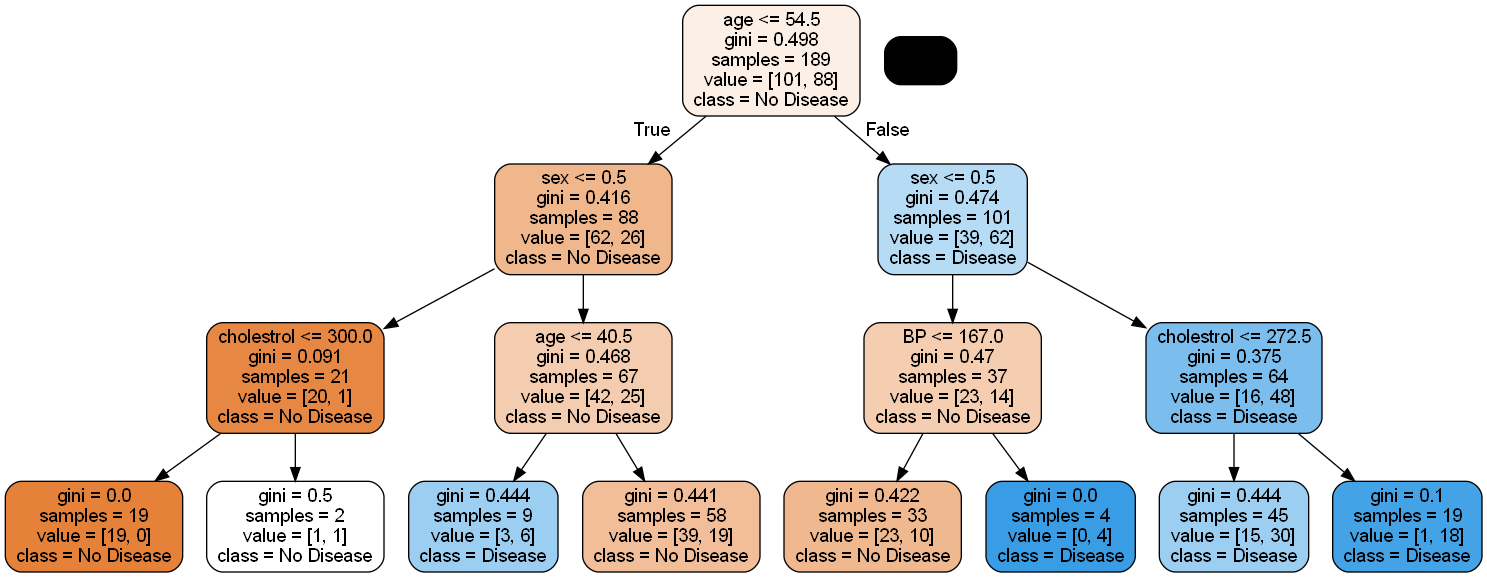

In [15]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [16]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [19]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [20]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [21]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [22]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

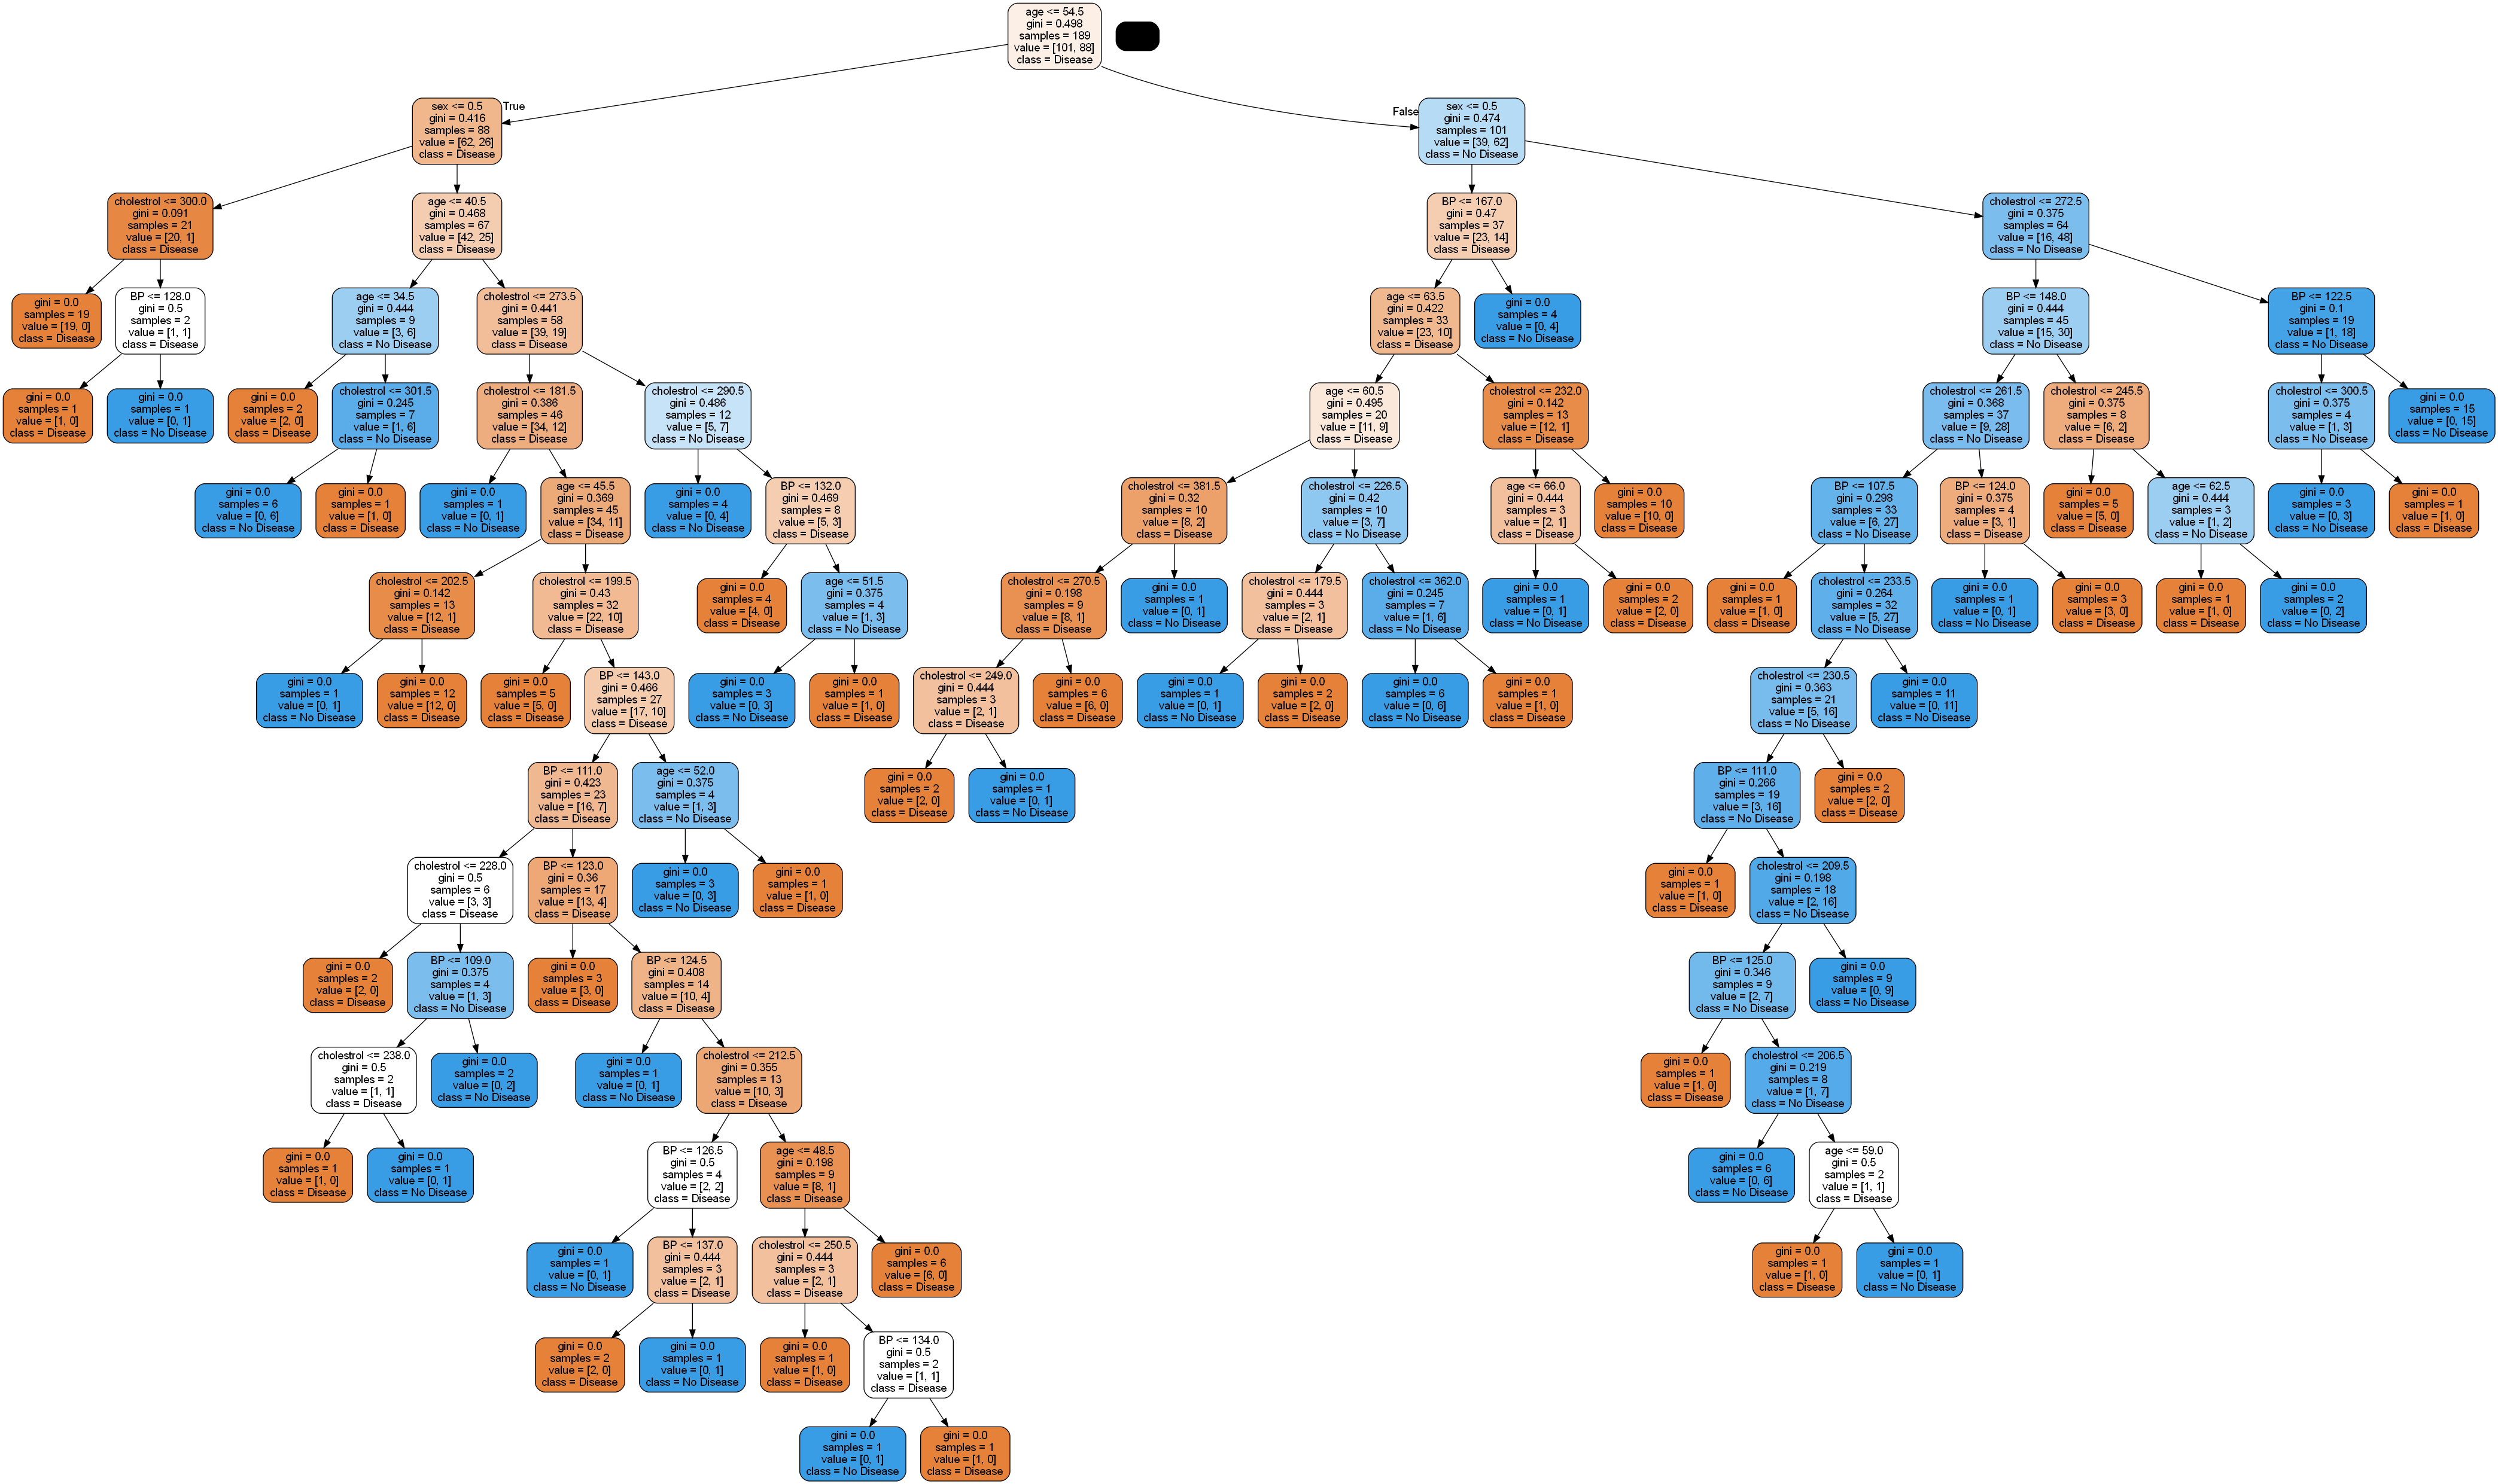

In [23]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [24]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [25]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [27]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

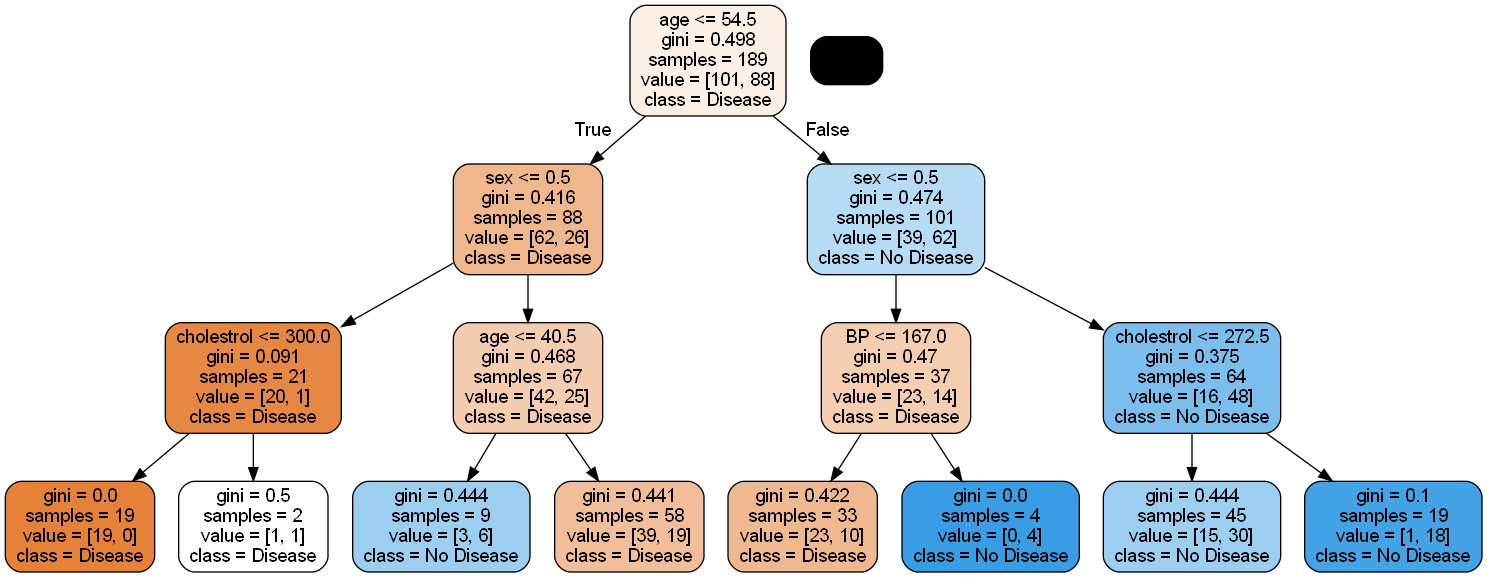

In [32]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [33]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [34]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

In [35]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [36]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [37]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

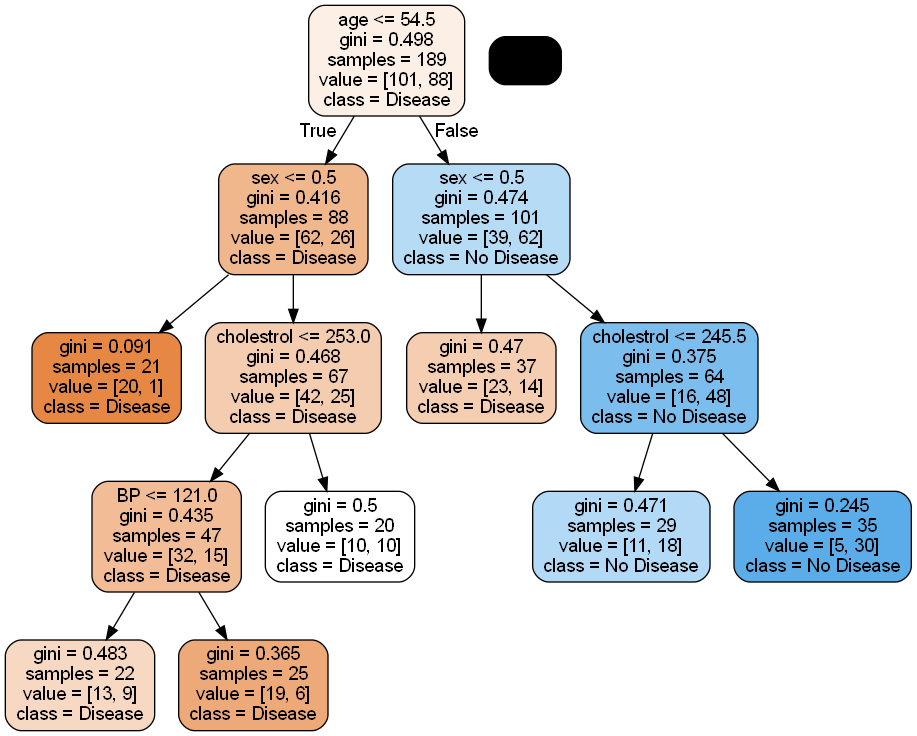

In [38]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [39]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [32]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

In [33]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [34]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [40]:
dt = DecisionTreeClassifier(random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20, 30, 40, 50],
    'criterion': ["gini", "entropy"]
}

In [43]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [44]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [45]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: total: 234 ms
Wall time: 5.19 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004527      0.001000         0.002499        0.000498   
1       0.005395      0.001014         0.003305        0.001174   
2       0.004649      0.000548         0.002753        0.000433   
3       0.004867      0.000421         0.002512        0.000361   
4       0.003893      0.000647         0.002752        0.000434   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     30   
4            gini               2                     40   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.574468           0.574468           0.510638         0.586769   
4           0.680851           0.574468           0.702128         0.661237   

   std_test_score  rank_test_score  
0        0.082762               34  
1        0.082762               34  
2        0.079551               38  
3        0.063728               61  
4        0.050684                4

In [47]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12       0.003235      0.000523         0.001410        0.000609   
42       0.002900      0.000189         0.002631        0.000648   
48       0.002002      0.000004         0.000877        0.000214   
4        0.003893      0.000647         0.002752        0.000434   
10       0.002504      0.000503         0.001999        0.000707   

   param_criterion param_max_depth param_min_samples_leaf  \
12            gini               4                      5   
42         entropy               3                      5   
48         entropy               4                      5   
4             gini               2                     40   
10            gini               3                     40   

                                               params  split0_test_score  \
12  {'criterion': 'gini', 'max_depth': 4, 'min_sam...           0.666667   
42  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
48  {'criterion': 'entropy', 'max_depth': 4, 'min_...           0.625000   
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
10  {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.687500   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
12           0.808511           0.617021           0.638298         0.682624   
42           0.765957           0.617021           0.680851         0.666999   
48           0.765957           0.638298           0.617021         0.661569   
4            0.680851           0.574468           0.702128         0.661237   
10           0.680851           0.574468           0.702128         0.661237   

    std_test_score  rank_test_score  
12        0.074784                1  
42        0.064090                2  
48        0.060746                3  
4         0.050684                4  
10        0.050684                4

In [48]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [49]:
dt_best = grid_search.best_estimator_

In [50]:
evaluate_model(dt_best)

Train Accuracy : 0.7777777777777778
Train Confusion Matrix:
[[82 19]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[35 14]
 [15 17]]


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71        49
           1       0.55      0.53      0.54        32

    accuracy                           0.64        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.64      0.64      0.64        81



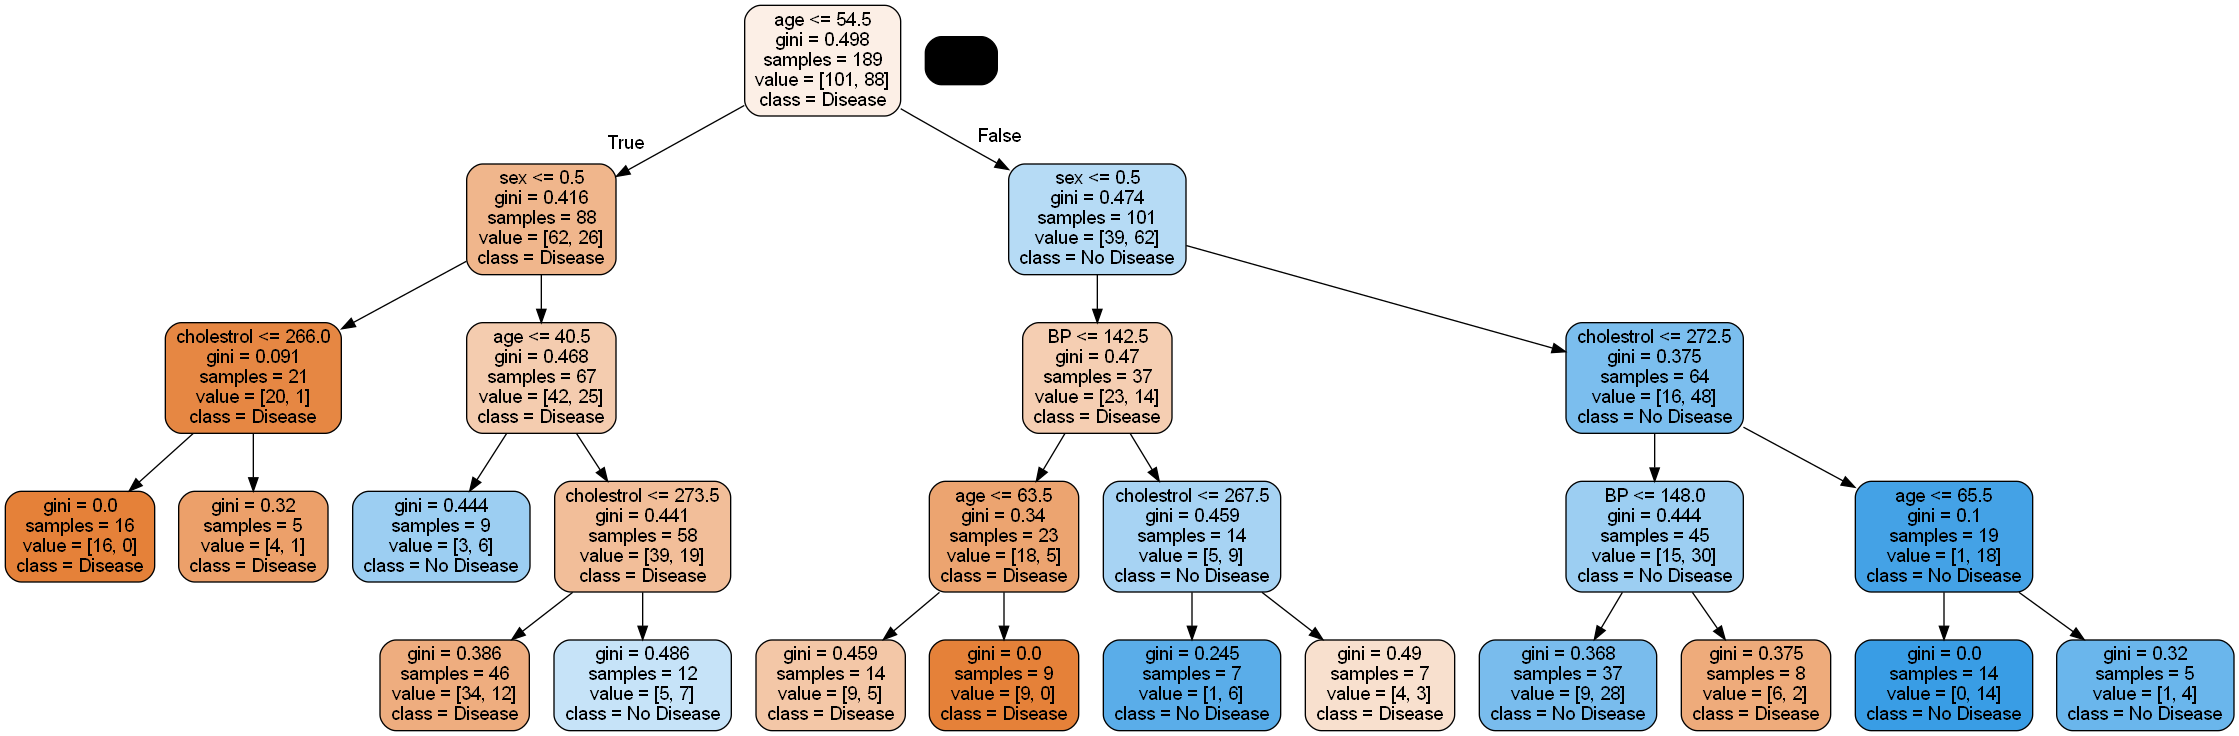

In [53]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())